# EDSA Apple Prices Challenge
### by team_32 on 17 May  2021
###### Dimakatso Mongwegelwa , Dineo Mahlangu , Phuti Marokhu, Letlhogonolo Menwe, Siphamandla Mandindi

# Challenge Description
Team_32 is required to predict the price of golden delicus apples per kilogram in the fresh produce industry, the prices may depend on seasons. 

This solution is meant to help the farming industry economically, such that the users of the system are able to accurately determine how much stock they need to have on hand and what price to set the golden delicius apples. 

# Dataset Description

The Golden Delicious apples dataset was taken from the kaggle competition called the EDSA Apple Prices Challenge [1]. We would like to thank the Inventory Management Incubate team who did the initial work with this dataset. The dataset consists of 65 061 instances (rows) and 13 variables (columns).The following table describes variables that are in the dataset:

| Variable name | Type   | Definitions                      | Values and/or measure  |
|---------------|--------|----------------------------------| -----------------------|  
|Province	|Catagorical |	Province to which the apples come from?| *** distict values, eg. 'Cape'       |
|Container	|Catagorical |A Containers unique identifier	    |Not applicable          |
|Size_Grade	        |Categorical|	Quantity and Size if the grade of apples      | '1M' = '1 medium', '1L', '1X', '1S'| 
|Weight	        |Numeric	 |Weight of apples in Kilograms        |  	In Kilograms(kg)           |
|Commodities        |Categorical | raw material or primary agricultural product that can be bought and sold | 'APPLE GOLDEN DELICIOUS' |
|Date	        | Date-time | 	    Dates                    | in "YYYY-MM-DD" format     |
|Low_Price	        | Numeric  | Lowest prices	    | Positive integers    |
|High_Price|	Numeric | Highest prices |Positive integers|
|Sales_Total|	Numeric| Total sales made| Positive  floats | 
|Total_Kg_Sold	| Numeric|	Total unit(kg) of Apples sold |	Positive integers|
|Stock_On_Hand|Numeric |Shows how the hospital bill is to be paid or is paid|Positive integers|


## Notebook Outline
 1. Package Installation
 2. Importing Libraries
 3. Loading the Data
 4. Data Cleaning and Formating
 5. Exploratory Data Analysis
 6. Feature Engineering and Selection
 7. Linear regression & Parameter Tuning
 8. Model Evaluation
 9. Submission


# 1. Package Installation

In [1]:
pip install -U flask numpy pandas scikit-learn

Requirement already up-to-date: flask in c:\users\dineo\anaconda3\lib\site-packages (2.0.0)
Requirement already up-to-date: numpy in c:\users\dineo\anaconda3\lib\site-packages (1.20.3)
Requirement already up-to-date: pandas in c:\users\dineo\anaconda3\lib\site-packages (1.2.4)
Requirement already up-to-date: scikit-learn in c:\users\dineo\anaconda3\lib\site-packages (0.24.2)
Note: you may need to restart the kernel to use updated packages.


# 2. Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
#import math from scipy
#import stats from scipy.stats

# 3. Loading the Dataset

In [65]:
df1 = pd.read_csv('sample_submission.csv')
df_test = pd.read_csv('df-test_set.csv')
df_train = pd.read_csv('df-train_set.csv')
test_id = df_test ['Index']
df_test = df_test.drop ('Index', axis = 1)

## 3.1 Understanding the Data

In [67]:
df1.head()

,Index,avg_price_per_kg
0,1,13.94
1,2,1.30


In [68]:
df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [69]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [70]:
df2=df_train[df_train['Commodities']=='APPLE GOLDEN DELICIOUS']

In [71]:
df2.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [72]:
# checking how many entries are there in the dataset, this should correspond to the 65061 noted above
print ("The number of entries in training set:")
print(len(df2))  #  we were checking rows in the dataset
print ("The number of entries in testing set:")
print(len(df_test)) #  we were checking rows in the dataset
print("The shape of the dataFrame is:")
print(df2.shape)  #  we were checking rows how the dataset us structured
print("The shape of the dataFrame is:")
print(df_test.shape) 
# adding the rows of both training and testing set
print("the total entries of the dataset")
print(len(df2) + len(df_test))  

The number of entries in training set:
1952
The number of entries in testing set:
685
The shape of the dataFrame is:
(1952, 13)
The shape of the dataFrame is:
(685, 12)
the total entries of the dataset
2637


In [73]:
# Listing the Column names
df2.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [74]:
# Checking Data types of the variables
df2.dtypes

Province             object
Container            object
Size_Grade           object
Weight_Kg           float64
Commodities          object
Date                 object
Low_Price           float64
High_Price          float64
Sales_Total         float64
Total_Qty_Sold        int64
Total_Kg_Sold       float64
Stock_On_Hand         int64
avg_price_per_kg    float64
dtype: object

In [75]:
df2.count()

Province            1952
Container           1952
Size_Grade          1952
Weight_Kg           1952
Commodities         1952
Date                1952
Low_Price           1952
High_Price          1952
Sales_Total         1952
Total_Qty_Sold      1952
Total_Kg_Sold       1952
Stock_On_Hand       1952
avg_price_per_kg    1952
dtype: int64

###### There are no empty cells in this dataframe. Thus we can continue with cleaning the data.

# 4. Data Cleaning and Formating

#### 4.1 Dealing with Missing Values 

In [76]:
# check for cell that are empty 
((df2 == " ").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [77]:
((df2 == "-").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [78]:
((df2 == "999").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [79]:
((df2 == "NaN").sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

##### All the data is present in the datset as we observed no empty cells

#### 4.2 Dealing with special values

In [80]:
# checking your NaN - use encoding methods
df2.isnull()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
24,False,False,False,False,False,False,False,False,False,False,False,False,False
40,False,False,False,False,False,False,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,False,False,False,False,False,False,False,False,False,False,False,False,False
64291,False,False,False,False,False,False,False,False,False,False,False,False,False
64297,False,False,False,False,False,False,False,False,False,False,False,False,False
64304,False,False,False,False,False,False,False,False,False,False,False,False,False


In [81]:
df2.isnull().count()

Province            1952
Container           1952
Size_Grade          1952
Weight_Kg           1952
Commodities         1952
Date                1952
Low_Price           1952
High_Price          1952
Sales_Total         1952
Total_Qty_Sold      1952
Total_Kg_Sold       1952
Stock_On_Hand       1952
avg_price_per_kg    1952
dtype: int64

#### 4.3 Dealing with outliers

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales_Total'>

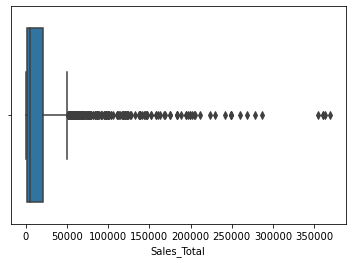

In [82]:
# use Histogram or Boxplot to see outliers and then remove
sns.boxplot(df2['Sales_Total'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight_Kg'>

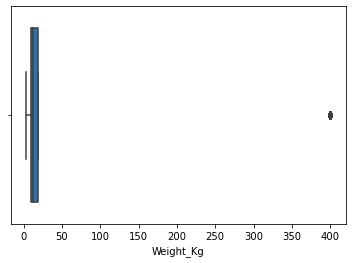

In [83]:
sns.boxplot(df2['Weight_Kg'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low_Price'>

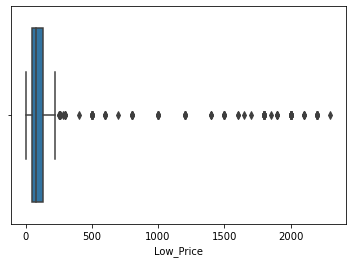

In [84]:
sns.boxplot(df2['Low_Price'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High_Price'>

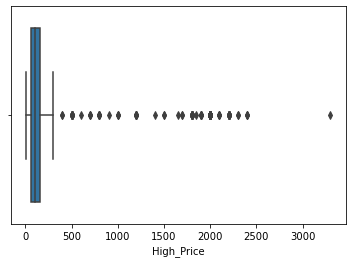

In [85]:
sns.boxplot(df2['High_Price'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Qty_Sold'>

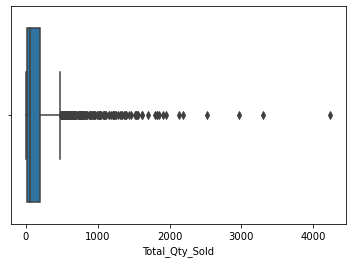

In [86]:
sns.boxplot(df2['Total_Qty_Sold'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stock_On_Hand'>

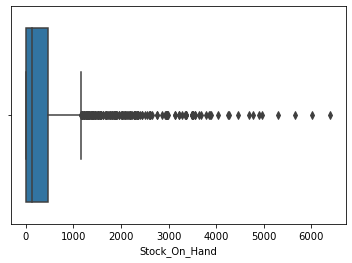

In [87]:
sns.boxplot(df2['Stock_On_Hand'])

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price_per_kg'>

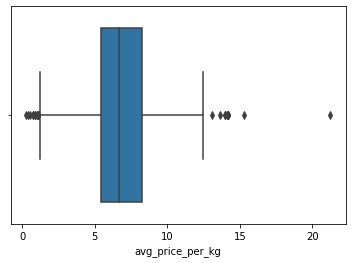

In [88]:
sns.boxplot(df2['avg_price_per_kg']) 

###### This varaible has inconsistancies and must be delt with

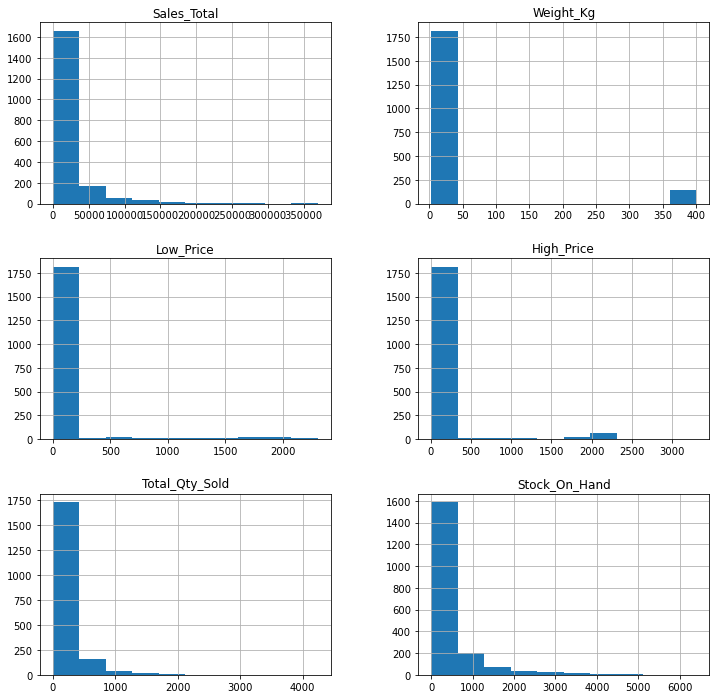

In [89]:
features = ['Sales_Total','Weight_Kg','Low_Price', 'High_Price', 'Total_Qty_Sold', 'Stock_On_Hand'] # create a list of all numerical features
df2[features].hist(figsize=(12,12));

#### 4.4 Dealing with Inconsistancies

In [90]:
# inconsistancies = eg male, female , dog
# here, we will go through all the catagorical to look for inconsistancies

df2["Province"].value_counts()


CAPE                    1045
W.CAPE-BERGRIVER ETC     440
EASTERN CAPE             206
WEST COAST               126
NATAL                    111
TRANSVAAL                 15
ORANGE FREE STATE          9
Name: Province, dtype: int64

In [91]:
df2["Container"].value_counts()

M4183    588
JE090    565
EC120    448
IA400    139
JG110     85
EF120     74
AC030     31
M6125     10
DT063      6
M9125      3
EG140      3
Name: Container, dtype: int64

In [92]:
df2["Size_Grade"].value_counts()

1S    532
1M    319
2S    308
2M    232
1L    225
1X    171
2L    120
2X     26
2U     17
1U      2
Name: Size_Grade, dtype: int64

In [93]:
df2["Commodities"].value_counts() 

APPLE GOLDEN DELICIOUS    1952
Name: Commodities, dtype: int64

#### 4.5 Dealing with Duplicates

# 5. Exploratory Data Analysis

### 5.1 Univaraite Data analysis

##### Univariate Analysis: Non-Graphical

##### Summary Statistics

In [94]:
# Numeric Stats
df2.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [95]:
# Catagotical Stats
df2.describe(include='O')

,Province,Container,Size_Grade,Commodities,Date
count,1952,1952,1952,1952,1952
unique,7,11,10,1,147
top,CAPE,M4183,1S,APPLE GOLDEN DELICIOUS,2020-07-20
freq,1045,588,532,1952,35


###### Checking skewness and Kurtosis

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

In [96]:
df2.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

In [97]:
df2.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

##### Univariate Analysis: Graphical

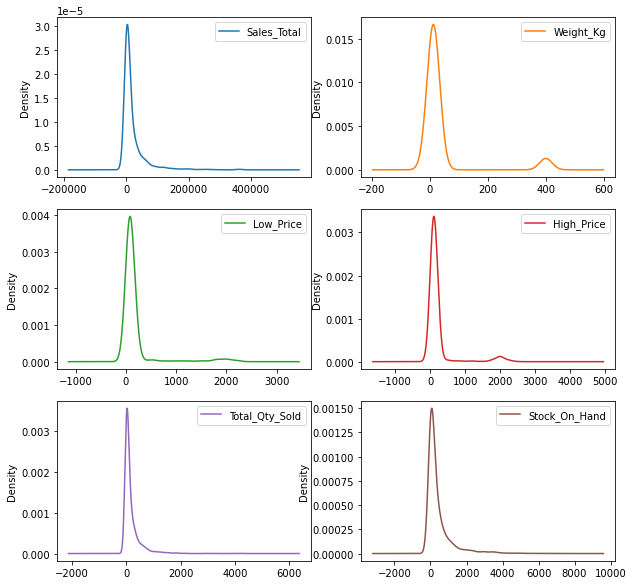

In [98]:
df2[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CAPE'),
  Text(1, 0, 'W.CAPE-BERGRIVER ETC'),
  Text(2, 0, 'EASTERN CAPE'),
  Text(3, 0, 'NATAL'),
  Text(4, 0, 'WEST COAST'),
  Text(5, 0, 'TRANSVAAL'),
  Text(6, 0, 'ORANGE FREE STATE')])

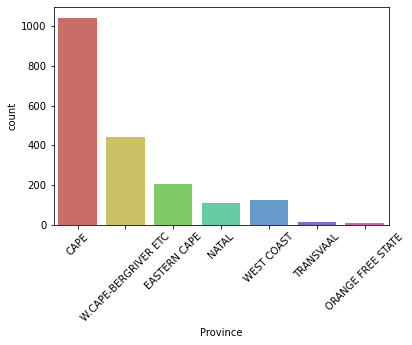

In [99]:
sns.countplot(x = 'Province', data = df2, palette="hls")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'M4183'),
  Text(1, 0, 'JG110'),
  Text(2, 0, 'JE090'),
  Text(3, 0, 'IA400'),
  Text(4, 0, 'EC120'),
  Text(5, 0, 'AC030'),
  Text(6, 0, 'M6125'),
  Text(7, 0, 'EF120'),
  Text(8, 0, 'DT063'),
  Text(9, 0, 'M9125'),
  Text(10, 0, 'EG140')])

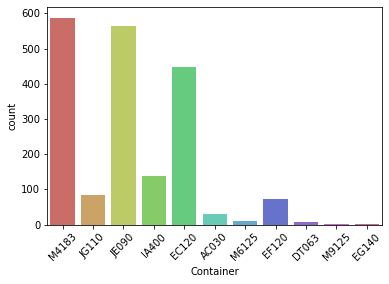

In [100]:
sns.countplot(x = 'Container', data = df2, palette="hls")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Commodities', ylabel='count'>

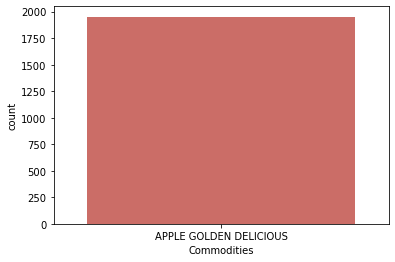

In [101]:
sns.countplot(x = 'Commodities', data = df2, palette="hls")


<AxesSubplot:xlabel='Size_Grade', ylabel='count'>

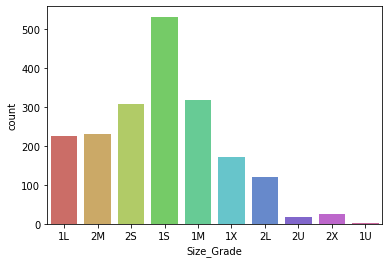

In [102]:
sns.countplot(x = 'Size_Grade', data = df2, palette="hls")

C:\Users\dineo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

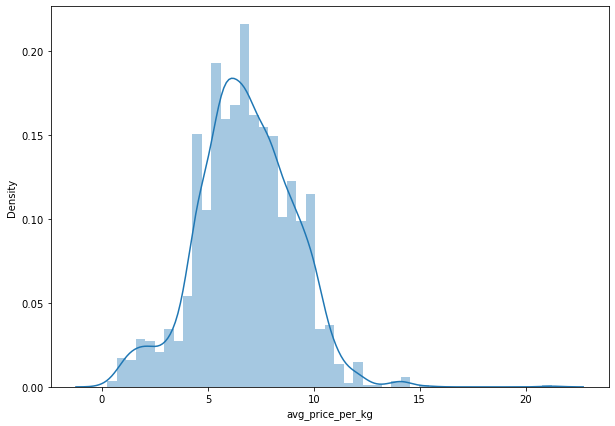

In [103]:
plt.subplots(figsize=(10,7))
sns.distplot(df2['avg_price_per_kg'],kde=True)

#### 5.2 Multivariate Data analysis

In [104]:
# check correlation with sales(research this). The ones(variables) with a high correlation we should select in below step.


# 6. Feature Engineering and Selection

In [105]:
# here, we will create new variable that will help in the prediction (if necessary) eg BMI
# also select variables that contribute to the response variable
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 278.0+ KB


In [106]:
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.DatetimeIndex(df2['Date']).day
df2.drop('Date', inplace=True, axis=1)

df2.head()

<ipython-input-106-25f17800053a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.DatetimeIndex(df2['Date']).year
<ipython-input-106-25f17800053a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.DatetimeIndex(df2['Date']).month
<ipython-input-106-25f17800053a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Year,Month,Day
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,150.0,170.0,51710.0,332,6075.6,822,8.51,2020,9,9
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,50.0,50.0,16000.0,320,3520.0,0,4.55,2020,4,14
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,55.0,55.0,990.0,18,162.0,1506,6.11,2020,4,16
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,80.0,120.0,32020.0,388,7100.4,443,4.51,2020,5,4
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,1800.0,1800.0,1800.0,1,400.0,2,4.50,2020,9,28


In [107]:
df_dummies = pd.get_dummies(df2)

# Again we make sure that all the column names have underscores instead of periods,whitespaces and dashes
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns] 
df_dummies.columns = [col.replace(" ", "_")for col in df_dummies.columns]
df_dummies.columns = [col.replace("-", "_")for col in df_dummies.columns]

df_dummies.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Year,Month,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE_GOLDEN_DELICIOUS
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,2020,9,...,0,0,0,0,0,0,0,0,0,1
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,2020,4,...,0,0,0,0,0,1,0,0,0,1
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,2020,4,...,0,0,0,0,0,0,1,0,0,1
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,2020,5,...,0,1,0,0,0,0,0,0,0,1
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,2020,9,...,0,1,0,0,0,0,0,0,0,1


In [108]:
df_dummies.shape

(1952, 40)

Re-order my dependendent variable (avg_price_per_kg) to be the last column

In [109]:
column_titles = [col for col in df_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies=df_dummies.reindex(columns=column_titles)

Correlation Matrix

In [110]:
df_dummies.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE_GOLDEN_DELICIOUS,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.019772,0.047613,0.016251,...,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183,NaN,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.021276,0.039084,-0.015764,...,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494,NaN,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.018911,0.047717,0.002058,...,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342,NaN,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.031264,-0.055853,-0.011699,...,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104,NaN,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.042132,-0.058639,-0.020402,...,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339,NaN,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,0.030462,-0.023098,0.003238,...,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667,NaN,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,-0.045846,-0.011749,0.081923,...,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271,NaN,0.105028
Year,-0.019772,-0.021276,-0.018911,0.031264,0.042132,0.030462,-0.045846,1.000000,-0.430853,-0.023257,...,0.012449,0.005800,0.004457,-0.014455,0.012357,0.030314,0.016977,-0.004439,NaN,-0.135526
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,-0.430853,1.000000,0.010012,...,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578,NaN,0.005205
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.023257,0.010012,1.000000,...,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454,NaN,-0.071334


Correlation heatmap

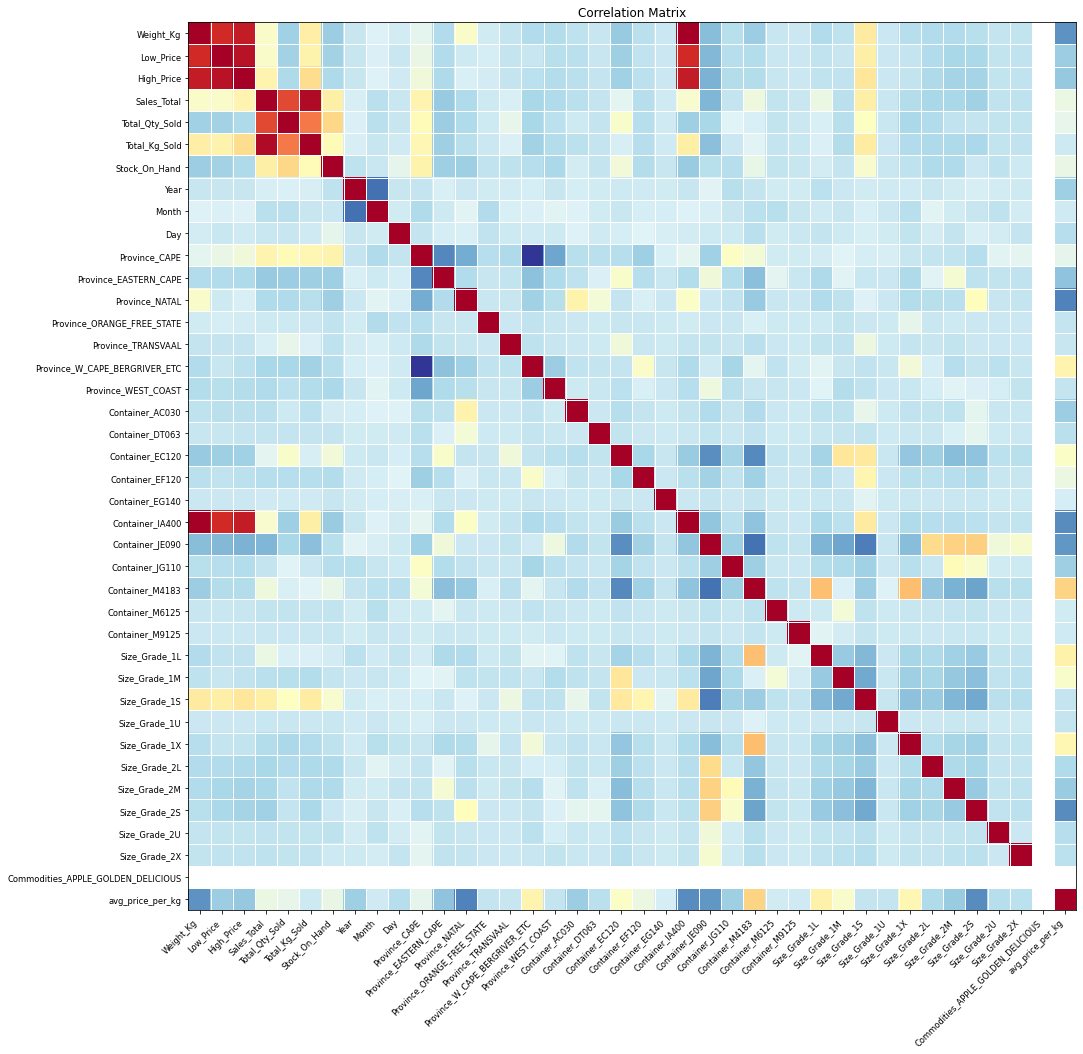

In [111]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);

# Fitting the Model

In [112]:
from statsmodels.formula.api import ols


# Model DataFrame with all of the columns:
dfm = df_dummies.copy()

# The dependent variable:
y_name = 'avg_price_per_kg'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [col for col in dfm.columns if col != y_name]

# Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + Year + Month + Day + Province_CAPE + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_IA400 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X + Commodities_APPLE_GOLDEN_DELICIOUS


In [113]:
# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     94.72
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        00:31:07   Log-Likelihood:                -3389.0
No. Observations:                1952   AIC:                             6848.
Df Residuals:                    1917   BIC:                             7043.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

## Model Training

In [114]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)

def fit_and_evaluate(model,x,y):
    
    x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    

    df = {'Train RMSE' : train_rmse, 'Train R^2' : train_r2, 'Test RMSE' : test_rmse, 'Test R^2' : test_r2}
    
    return df

In [115]:
model = LinearRegression(n_jobs = -1)
y = df2['avg_price_per_kg']
y.shape

(1952,)

In [116]:
x = df2['Weight_Kg'].values.reshape(-1, 1)
fit_and_evaluate(model,x,y)


{'Train RMSE': 2.141562200474744,
 'Train R^2': 0.11028193098883021,
 'Test RMSE': 2.0112189625232535,
 'Test R^2': 0.12825310685500813}

In [117]:
x = df2['Low_Price'].values.reshape(-1, 1)
fit_and_evaluate(model,x,y)

{'Train RMSE': 2.249765474546225,
 'Train R^2': 0.01810393289249601,
 'Test RMSE': 2.126871344094777,
 'Test R^2': 0.02511331688069718}

In [118]:
x = df2[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']].values
fit_and_evaluate(model,x,y)

{'Train RMSE': 1.8029960581006492,
 'Train R^2': 0.36936135627478095,
 'Test RMSE': 1.7190231085203471,
 'Test R^2': 0.3631529698372783}

In [119]:
x = df_dummies.drop('avg_price_per_kg',axis=1).values
y = df_dummies['avg_price_per_kg']
fit_and_evaluate(model,x,y)

{'Train RMSE': 1.3684820676474723,
 'Train R^2': 0.6366967802150388,
 'Test RMSE': 1.4096633688262639,
 'Test R^2': 0.5717449163776245}

In [120]:
x = df2[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
model.fit(x_train, y_train)
new_pred= model.predict(x_test)
new_pred [:20]

array([6.67767975, 6.67351951, 6.88080461, 6.85502858, 6.90335766,
       7.34277432, 7.6135986 , 4.64385978, 7.28907706, 5.57466609,
       6.817253  , 7.04102765, 6.37011974, 4.33140321, 3.02979079,
       5.85544873, 6.47167201, 7.46263447, 6.63694647, 1.92482374])

In [121]:
#storing model
pkl_file = "mlr_model.pkl"
with open (pkl_file, 'wb') as file:
    pickle.dump(model,file)

In [122]:
#Loading the model

with open (pkl_file, 'rb') as file:
    Pickled_Model = pickle.load(file)

# 7. Linear regression & Parameter Tuning

In [123]:
# Normalize the feature(this puts the data(variables) in the same space)

In [124]:
# Define the linear regression algorithm

### Predicting a test set

In [126]:
df_test['Year'] = pd.DatetimeIndex(df_test['Date']).year
df_test['Month'] = pd.DatetimeIndex(df_test['Date']).month
df_test['Day'] = pd.DatetimeIndex(df_test['Date']).day
df_test.drop('Date', inplace=True, axis=1)

df_test.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,128.0,136.0,5008.0,38,456.0,0,2020,7,9
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,220.0,220.0,1760.0,8,146.4,2,2020,1,20
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,120.0,120.0,720.0,6,72.0,45,2020,8,19
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,160.0,160.0,160.0,1,18.3,8,2020,5,6
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,140.0,160.0,14140.0,100,1830.0,19,2020,5,4


In [128]:
X_real = pd.get_dummies(df_test)
# Again we make sure that all the column names have underscores instead of periods,whitespaces and dashes
X_real.columns = [col.replace(".","_") for col in X_real.columns] 
X_real.columns = [col.replace(" ", "_")for col in X_real.columns]
X_real.columns = [col.replace("-", "_")for col in X_real.columns]
X_real.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Year,Month,Day,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,Commodities_APPLE_GOLDEN_DELICIOUS
0,12.0,128.0,136.0,5008.0,38,456.0,0,2020,7,9,...,1,0,0,0,0,0,0,0,0,1
1,18.3,220.0,220.0,1760.0,8,146.4,2,2020,1,20,...,0,0,0,1,0,0,0,0,0,1
2,12.0,120.0,120.0,720.0,6,72.0,45,2020,8,19,...,0,1,0,0,0,0,0,0,0,1
3,18.3,160.0,160.0,160.0,1,18.3,8,2020,5,6,...,1,0,0,0,0,0,0,0,0,1
4,18.3,140.0,160.0,14140.0,100,1830.0,19,2020,5,4,...,0,0,0,0,0,0,0,0,0,1


In [129]:
df2.shape, df_test.shape

((1952, 15), (685, 14))

In [130]:
df_dummies.shape , X_real.shape

((1952, 40), (685, 39))

### Making predictions

In [131]:
pred = Pickled_Model.predict(X_real[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']].values)
pred[:10]

array([7.27790718, 7.36944223, 7.08551263, 7.08211535, 7.25190841,
       5.39627452, 6.76642481, 7.42829649, 7.50639921, 7.17820049])

In [122]:
# Parameter tuning 

In [123]:
# Predictions

# 8. Model Evaluation 

In [124]:
# This is where we check perfomance matrices(measures)

# 9. Submission

In [132]:
# create a submission dataframe
submission = pd.DataFrame(
          {'Index' : test_id,
            'Avg_Price_Per_Kg': pred
           })

In [133]:
submission.head()

,Index,Avg_Price_Per_Kg
0,1,7.277907
1,2,7.369442
2,3,7.085513
3,4,7.082115
4,5,7.251908


In [134]:
# save DataFrame to csv file for submission
submission.to_csv("full set.csv", index=False)

# 10. Bibliography

[1] https://www.kaggle.com/c/edsa-apple-prices-challenge